# 0 - Imports

In [69]:
# Manejo de datos
import pandas as pd
import numpy as np
import tempfile
import os

# Pycaret
import pycaret
from pycaret.classification import *

# MLFlow
import mlflow

# Utilidades
import sys
sys.path.append("..\..")


# 1- Cargar datos

In [70]:
X_train  = pd.read_parquet("../../data/modifications/TfidfVectorizer/X_train.parquet")
Y_train  = pd.read_parquet("../../data/modifications/TfidfVectorizer/Y_train.parquet")

In [71]:
# Juntar dataset para pycaret
df = X_train.copy()
df["target"] = Y_train["target"]
df

,0,1,2,3,4,5,6,7,8,9,...,17673,17674,17675,17676,17677,17678,17679,17680,17681,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.477564,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# 2 - Elección Pycaret

<span style="color:red">Introduce el nombre de la prueba de modelo para el regsitro MLFlow</span>

In [72]:
mlflow.set_tracking_uri("../../mlflow/")
#mlflow.set_experiment("NPL-Tweets")

In [73]:
name = "prueba_1"

In [74]:
df_py = setup(
    data = df,                          # El conjunto de datos en el que se realizará el modelado.
    target = 'target',                  # El nombre de la columna que se desea predecir.
    train_size = 0.7,                   # Proporción del conjunto para entrenamiento. Por defecto es 0.7.
    preprocess = False,                 # Preprocesamiento automático del conjunto de datos. Por defecto es True.
    normalize = False,                  # Normalizar el conjunto usando el método Z-score. Por defecto es False.
    transformation = False,             # Aplicar transformación logarítmica. Por defecto es False.
    remove_multicollinearity = False,   # Eliminar características con alta multicolinealidad. Por defecto es False.
    multicollinearity_threshold = 0.9,  # Umbral de multicolinealidad. Por defecto es 0.9.
    pca = False,                        # Aplicar Análisis de Componentes Principales. Por defecto es False.
    pca_components = None,              # Número o proporción de componentes PCA. Por defecto es None.
    ignore_features = None,             # Lista de características a ignorar. Por defecto es None.
    session_id = 123,                   # Un número aleatorio semilla para reproducibilidad en todos los objetos del modelo.
    log_experiment = True,              # Registra en MLFlow
    log_plots = True,                   # Guardar las gráficas
    experiment_name = 'NPL-Tweets'       # Nombre del experimento para registro en MLflow
)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(7613, 17683)"
4,Transformed data shape,"(7613, 17683)"
5,Transformed train set shape,"(5329, 17683)"
6,Transformed test set shape,"(2284, 17683)"
7,Numeric features,17682


In [75]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:01:41
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7932,0.8568,0.6140,0.8660,0.7177,0.5622,0.5834,13.9800
ridge,Ridge Classifier,0.7868,0.0000,0.6555,0.8125,0.7249,0.5543,0.5633,3.9670
rf,Random Forest Classifier,0.7803,0.8381,0.6022,0.8412,0.7010,0.5351,0.5543,12.5630
svm,SVM - Linear Kernel,0.7776,0.0000,0.6799,0.7756,0.7241,0.5393,0.5431,4.2940
dt,Decision Tree Classifier,0.7390,0.7335,0.6847,0.7014,0.6924,0.4658,0.4665,28.5680
ada,Ada Boost Classifier,0.7318,0.7299,0.5048,0.7991,0.6171,0.4269,0.4545,8.6380
gbc,Gradient Boosting Classifier,0.7305,0.7840,0.4520,0.8517,0.5896,0.4163,0.4630,28.4570
lda,Linear Discriminant Analysis,0.6834,0.7261,0.7284,0.6191,0.6634,0.3698,0.3800,935.4360
nb,Naive Bayes,0.6236,0.6389,0.7480,0.5455,0.6306,0.2657,0.2800,3.0290
qda,Quadratic Discriminant Analysis,0.3477,0.1132,0.0686,0.1193,0.0828,0.0280,0.0330,21.7810


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [1]:
print(best_model)

NameError: name 'best_model' is not defined

In [ ]:
plot_model(best_model, plot = "auc")

ValueError: Estimator [] does not have the required fit() method.

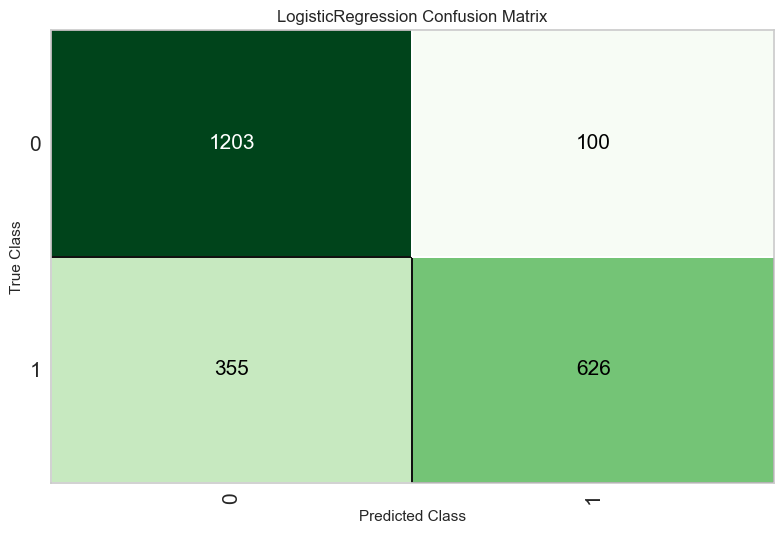

In [ ]:
plot_model(best_model, plot = "confusion_matrix")

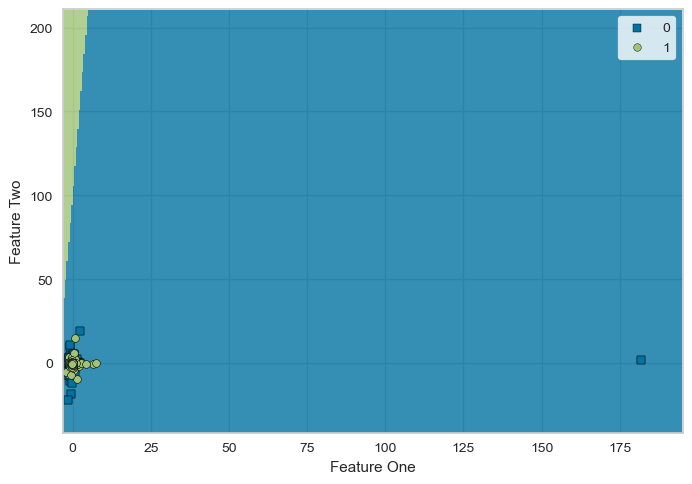

In [ ]:
plot_model(best_model, plot = "boundary")

In [ ]:
save_model(
    model = best_model,
    model_name= "../../models/1_pycaret")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=1000,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=123,
                                     solver='lbfgs', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False),
 '../../models/1_pycaret.pkl')